# **ML Model for Cancer Detection using Python**

In this notebook, I used SVM (Support Vector Machines) to build and train a model using human cell records, and classify cells to whether the samples are benign or malignant.

This project is to retrieve and analyze the data from UCI Machine Learning Repository (Asuncion and Newman, 2007) about the several hundred human cell sample records and determine the severity of their Cancer. Here are the steps by step process on how I manage to perform the retrieval of the data to analysis.

*   Data Wrangling
*   Explanatory Data Analysis
*   Model Analysis
*   Model Assessment

## Data Wrangling

Lets install first the required libraries.

In [14]:
!pip install scikit-learn
!pip install seaborn

In [15]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Then lets retrieve the data from UCI Machine Learning Repository site.

In [3]:
!wget -O cell_samples.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv
cell_df = pd.read_csv("cell_samples.csv")
cell_df.head()

--2024-06-23 13:36:54--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19975 (20K) [text/csv]
Saving to: ‘cell_samples.csv’

cell_samples.csv    100%[===================>]  19.51K  --.-KB/s    in 0s      

2024-06-23 13:36:54 (191 MB/s) - ‘cell_samples.csv’ saved [19975/19975]



,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


<h2 id="about_dataset">About the Cancer data</h2>
The example is based on a dataset that is publicly available from the UCI Machine Learning Repository (Asuncion and Newman, 2007)[http://mlearn.ics.uci.edu/MLRepository.html]. The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. The fields in each record are:

|Field name|Description|
|--- |--- |
|ID|Clump thickness|
|Clump|Clump thickness|
|UnifSize|Uniformity of cell size|
|UnifShape|Uniformity of cell shape|
|MargAdh|Marginal adhesion|
|SingEpiSize|Single epithelial cell size|
|BareNuc|Bare nuclei|
|BlandChrom|Bland chromatin|
|NormNucl|Normal nucleoli|
|Mit|Mitoses|
|Class|Benign or malignant|

<br>
<br>

Lets check how many records and columns it has.

In [4]:
cell_df.shape

(699, 11)

This means that the dataset has 699 records and 11 fields. Now lets check if there are missing values on the dataset.

In [6]:
missing_data = cell_df.isnull()
missing_data.head(5)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


Using a for loop in Python, you can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value and "False" means the value is present in the data set. In the body of the for loop the method ".value_counts()" counts the number of "True" values.

In [7]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

ID
ID
False    699
Name: count, dtype: int64

Clump
Clump
False    699
Name: count, dtype: int64

UnifSize
UnifSize
False    699
Name: count, dtype: int64

UnifShape
UnifShape
False    699
Name: count, dtype: int64

MargAdh
MargAdh
False    699
Name: count, dtype: int64

SingEpiSize
SingEpiSize
False    699
Name: count, dtype: int64

BareNuc
BareNuc
False    699
Name: count, dtype: int64

BlandChrom
BlandChrom
False    699
Name: count, dtype: int64

NormNucl
NormNucl
False    699
Name: count, dtype: int64

Mit
Mit
False    699
Name: count, dtype: int64

Class
Class
False    699
Name: count, dtype: int64



This means that there are no missing values on our dataset. Now lets check if there are fields that have wrong data types.

In [8]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

As we can see the BareNuc is in object data type. We have to update it to integer.

In [9]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

<ipython-input-9-df8bc795062c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

Now lets separate the independent and dependent variables of our dataset for train/test split later.

In [10]:
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [11]:
y = np.asarray(cell_df['Class'])
y [0:5]

array([2, 2, 2, 2, 2])

## Explanatory Data Analysis

Lets calculate the correlations between each variable to the Class Predictor Variable

In [13]:
numeric_df = cell_df.select_dtypes(include=[float, int])
numeric_df.corr()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
ID,1.000000,-0.056350,-0.041396,-0.042221,-0.069630,-0.048644,-0.099248,-0.061966,-0.050699,-0.037972,-0.084701
Clump,-0.056350,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
UnifSize,-0.041396,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
UnifShape,-0.042221,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
MargAdh,-0.069630,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
SingEpiSize,-0.048644,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
BareNuc,-0.099248,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
BlandChrom,-0.061966,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
NormNucl,-0.050699,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mit,-0.037972,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448


Based on the correlation Map, almost all present variables can be used to predict the class of the Cancer Cell.

The ID field contains the patient identifiers. The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the closest to benign.

The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

Let's look at the distribution of the classes based on Clump thickness and Uniformity of cell size:

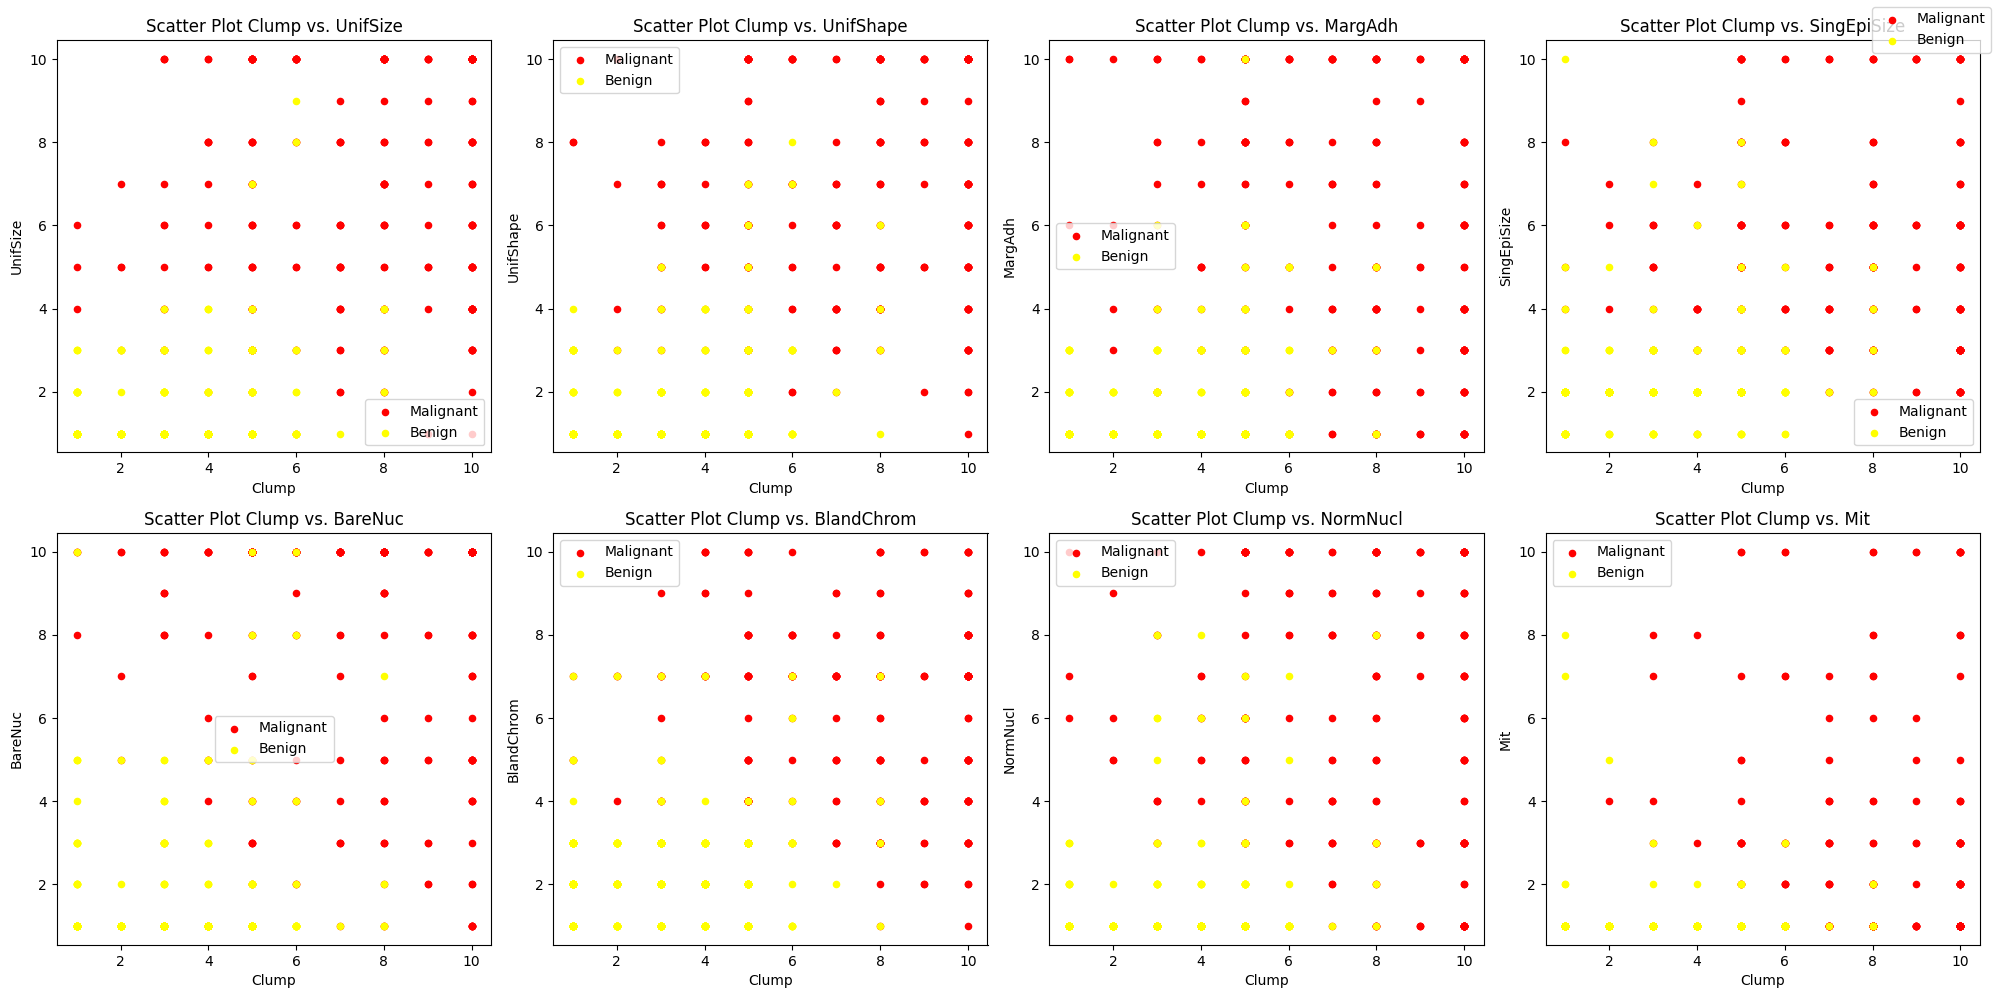

In [40]:
# Define the parameters you want to plot against 'Clump'
params = ["UnifSize", "UnifShape", "MargAdh", "SingEpiSize", "BareNuc", "BlandChrom", "NormNucl", "Mit"]

# Number of parameters
n_params = len(params)

# Create a figure with subplots arranged in a grid
fig, axes = plt.subplots(nrows=2, ncols=(n_params + 1) // 2, figsize=(20, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot each parameter against 'Clump' with class labels
for i, param in enumerate(params):
    ax = axes[i]
    cell_df[cell_df['Class'] == 4].plot(kind='scatter', x='Clump', y=param, color='Red', label='Malignant', ax=ax)
    cell_df[cell_df['Class'] == 2].plot(kind='scatter', x='Clump', y=param, color='Yellow', label='Benign', ax=ax)
    ax.set_title(f'Scatter Plot Clump vs. {param}')
    ax.set_xlabel('Clump')
    ax.set_ylabel(param)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Create a common legend for all subplots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()

Now lets check the statistics data using the cancer dataset.

In [29]:
cell_df.describe()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Lets check the box plot distribution of each field in there classes.

<ipython-input-43-95ba32dc0dae>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Benign (Class 2)', 'Malignant (Class 4)'])
<ipython-input-43-95ba32dc0dae>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Benign (Class 2)', 'Malignant (Class 4)'])
<ipython-input-43-95ba32dc0dae>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Benign (Class 2)', 'Malignant (Class 4)'])
<ipython-input-43-95ba32dc0dae>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Benign (Class 2)', 'Malignant (Class 4)'])
<ipython-input-43-95ba32dc0dae>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Benign (Class 2)', 'Malignant (Class 4)'])
<ipython-input-43-95ba32dc0dae>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax

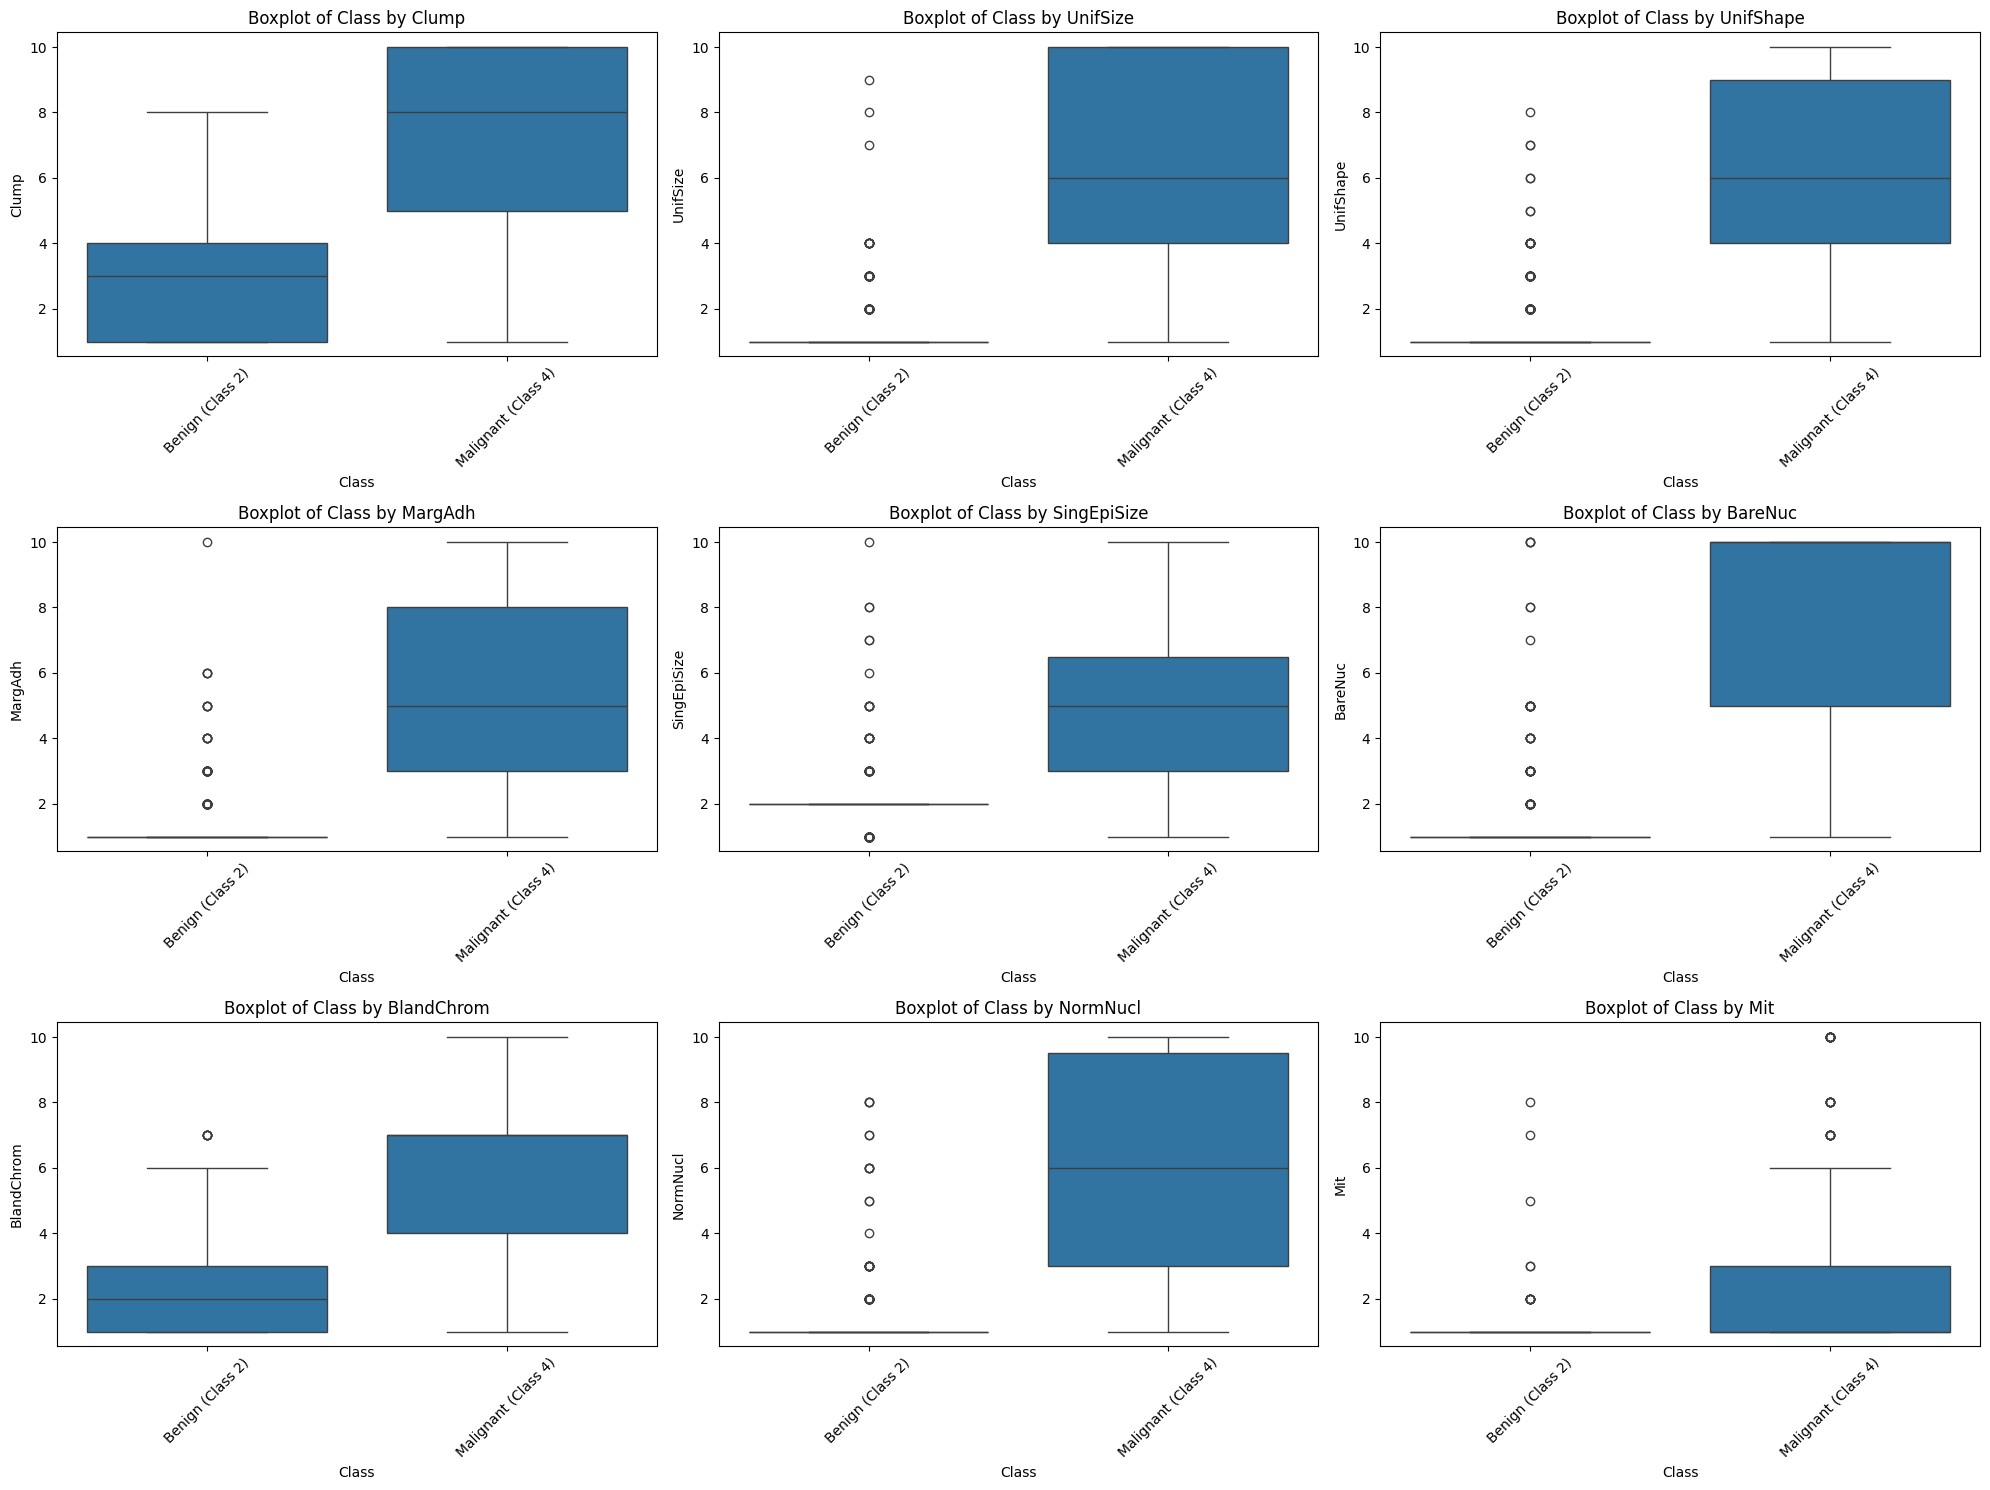

In [43]:
params = ["Clump", "UnifSize", "UnifShape", "MargAdh", "SingEpiSize", "BareNuc", "BlandChrom", "NormNucl", "Mit"]

# Number of parameters
n_params = len(params)

# Calculate the number of rows and columns for the grid
n_cols = 3
n_rows = (n_params + n_cols - 1) // n_cols

# Create a figure with subplots arranged in a grid
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 15))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot each parameter against 'Class'
for i, param in enumerate(params):
    ax = axes[i]
    sns.boxplot(y=param, x="Class", data=cell_df, ax=ax)
    ax.set_title(f'Boxplot of Class by {param}')
    ax.set_xlabel('Class')
    ax.set_ylabel(param)
    ax.set_xticklabels(['Benign (Class 2)', 'Malignant (Class 4)'])
    ax.tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Model Analysis

For this project we will use SVM or Support Vector Machine since this is a classification problem.

A Support Vector Machine is a supervised algorithm that can classify cases by finding a separator. SVM works by first mapping data to a high dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. It represents a linearly non separable data set. The two categories can be separated with a curve but not a line.

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

    1.Linear
    2.Polynomial
    3.Radial basis function (RBF)
    4.Sigmoid
Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset. Lets use and compare the different functions and check which would be the best fit for our dataset.

Train/Test dataset: Now lets split our dataset in a 80:20 ratio.

In [45]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


Lets build 4 SVM models using each type.

In [53]:
from sklearn import svm
#linear
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
yhat_linear = svm_linear.predict(X_test)

In [54]:
#polynomial
svm_poly = svm.SVC(kernel='poly')
svm_poly.fit(X_train, y_train)
yhat_poly = svm_poly.predict(X_test)

In [55]:
#rbf
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
yhat_rbf = svm_rbf.predict(X_test)

In [56]:
#sigmoid
svm_sigmoid = svm.SVC(kernel='sigmoid')
svm_sigmoid.fit(X_train, y_train)
yhat_sigmoid = svm_sigmoid.predict(X_test)

## Model Evaluation

To assess which of the 4 models will be used for our problem, we can check the distribution plot of the 4 models.

In [65]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 10
    height = 6
    plt.figure(figsize=(width, height))

    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Distribution')
    plt.ylabel('Class')
    plt.show()
    plt.close()

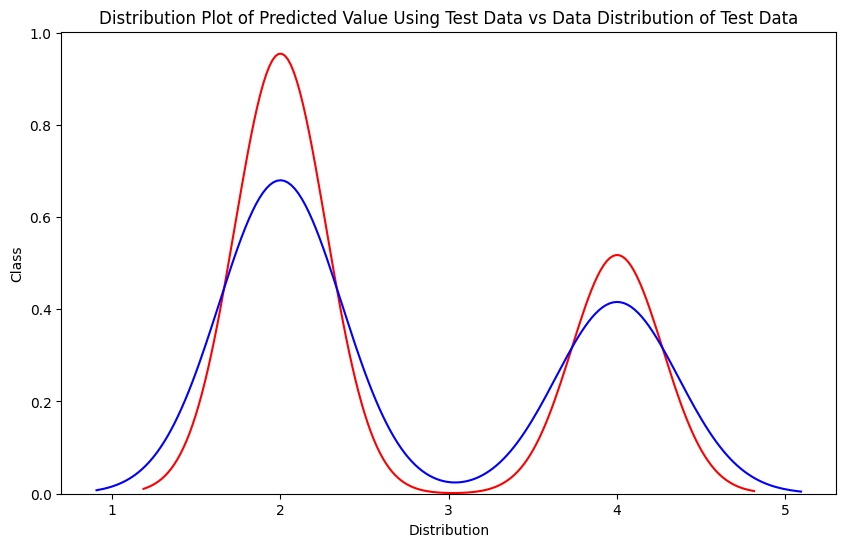

In [66]:
Title='Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_train, yhat_linear, "Actual Values (Train)", "SVM Predicted Values (Linear)", Title)

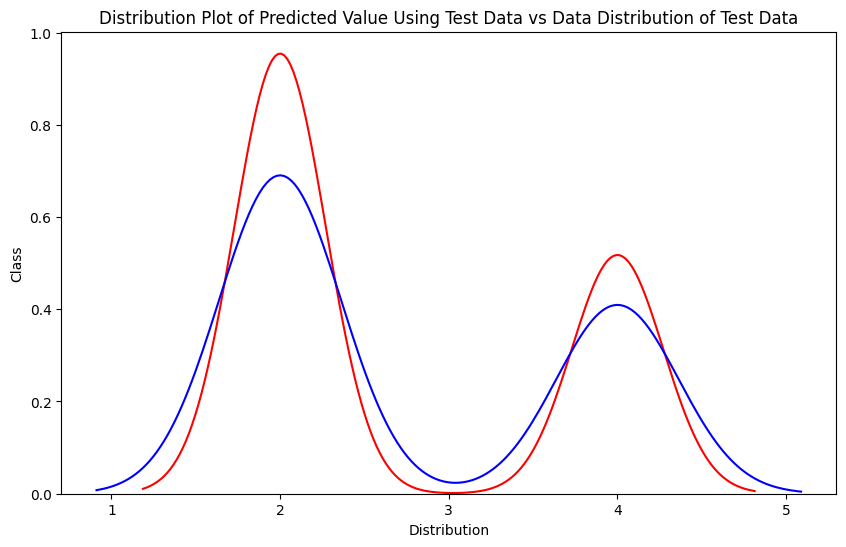

In [67]:
Title='Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_train, yhat_poly, "Actual Values (Train)", "SVM Predicted Values (Polynomial)", Title)

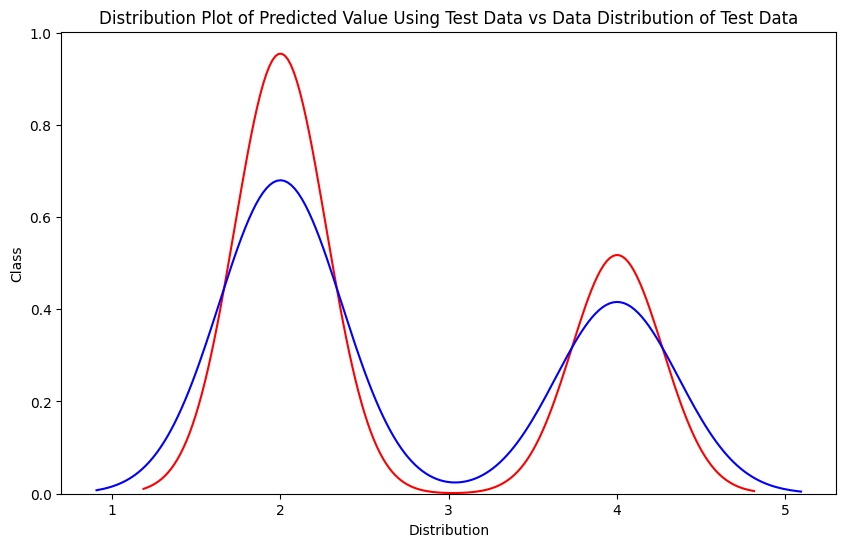

In [68]:
Title='Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_train, yhat_rbf, "Actual Values (Train)", "SVM Predicted Values (RBF)", Title)

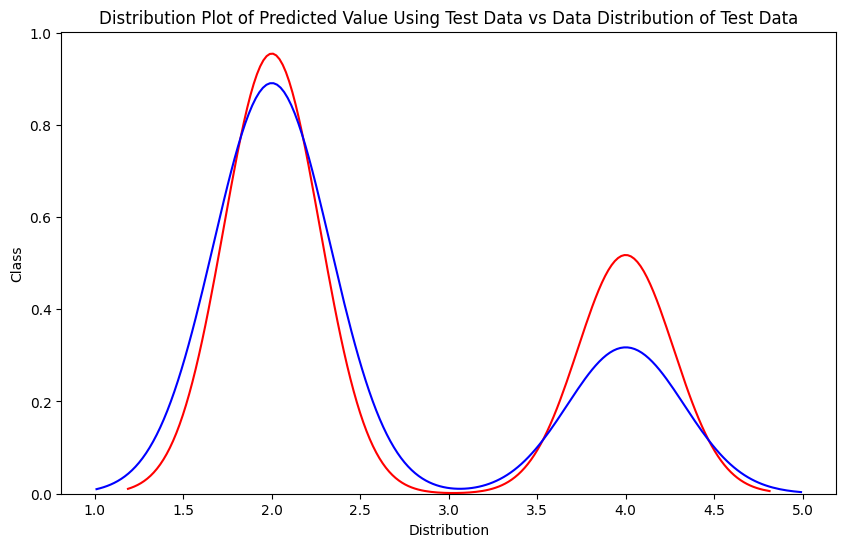

In [69]:
Title='Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_train, yhat_sigmoid, "Actual Values (Train)", "SVM Predicted Values (Sigmoid)", Title)

Lets also generate the confusion matrix of each models.

In [70]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [71]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix for Linear SVM

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


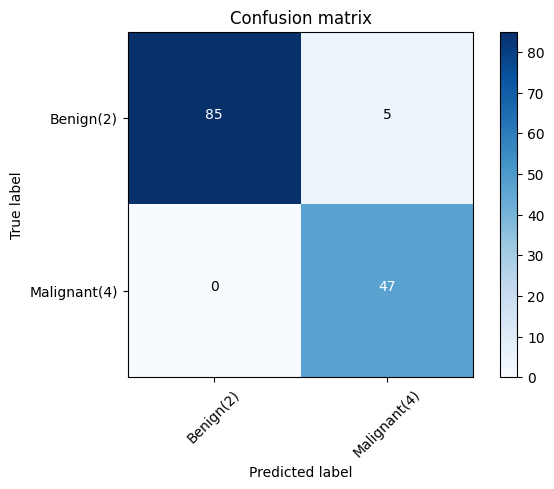

In [72]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_linear, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_linear))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

Confusion Matrix for Polynomial

              precision    recall  f1-score   support

           2       1.00      0.96      0.98        90
           4       0.92      1.00      0.96        47

    accuracy                           0.97       137
   macro avg       0.96      0.98      0.97       137
weighted avg       0.97      0.97      0.97       137

Confusion matrix, without normalization
[[86  4]
 [ 0 47]]


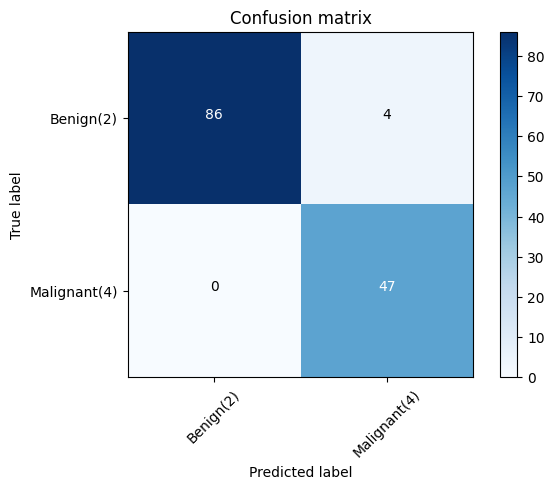

In [73]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_poly, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_poly))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

Confusion Matrix for RBF

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


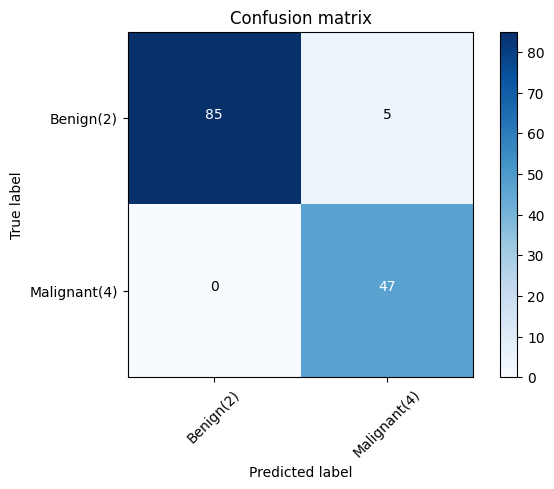

In [74]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_rbf, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_rbf))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

Confusion Matrix for Sigmoid

              precision    recall  f1-score   support

           2       0.53      0.60      0.57        90
           4       0.00      0.00      0.00        47

    accuracy                           0.39       137
   macro avg       0.27      0.30      0.28       137
weighted avg       0.35      0.39      0.37       137

Confusion matrix, without normalization
[[54 36]
 [47  0]]


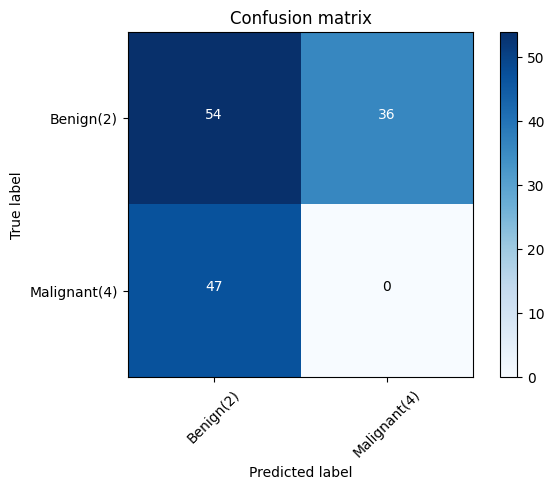

In [75]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_sigmoid, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_sigmoid))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

Lets also check the Jaccard Index of the 4 models.

Linear

In [76]:
from sklearn.metrics import f1_score, jaccard_score, accuracy_score

In [79]:
print("Accuracy: %.4f" % accuracy_score(y_test, yhat_linear))
print("Avg F1-score: %.4f" % f1_score(y_test, yhat_linear, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat_linear,pos_label=2))

Accuracy: 0.9635
Avg F1-score: 0.9639
Jaccard score: 0.9444


Polynomial

In [80]:
print("Accuracy: %.4f" % accuracy_score(y_test, yhat_poly))
print("Avg F1-score: %.4f" % f1_score(y_test, yhat_poly, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat_poly,pos_label=2))

Accuracy: 0.9708
Avg F1-score: 0.9711
Jaccard score: 0.9556


RBF

In [81]:
print("Accuracy: %.4f" % accuracy_score(y_test, yhat_rbf))
print("Avg F1-score: %.4f" % f1_score(y_test, yhat_rbf, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat_rbf,pos_label=2))

Accuracy: 0.9635
Avg F1-score: 0.9639
Jaccard score: 0.9444


Sigmoid

In [82]:
print("Accuracy: %.4f" % accuracy_score(y_test, yhat_sigmoid))
print("Avg F1-score: %.4f" % f1_score(y_test, yhat_sigmoid, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat_sigmoid,pos_label=2))

Accuracy: 0.3942
Avg F1-score: 0.3715
Jaccard score: 0.3942


## Conlcusion

Among the 4 models, the Sigmoid has the lowest results with Accuracy: 0.3942, Avg F1-score: 0.3715 and Jaccard score: 0.3942. The best suitable mode would be Polynomial with Accuracy: 0.9708, Avg F1-score: 0.9711 and Jaccard score: 0.9556.